<img src="../src/CY-Cergy-Paris-172_coul.png">

## Diplôme universitaire Data Analyst (DUDA)

### Introduction aux statistiques

Juin 2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
import pingouin as pg
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
from statsmodels.formula.api import logit
from statsmodels.formula.api import ols
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.proportion import proportions_ztest

from scipy.stats import poisson
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

In [3]:
fichiers = ['countries.HDI.csv','effec1.quest.compil.csv', 'effec2.quest.compil.csv',
           'effec3.quest.compil.csv', 'usages1.effec1.csv', 'usages2.effec2.csv', 
          'usages3.effec3.csv']

for fichier in fichiers:
        nom = fichier.split(".")[0]
        dataf = pd.read_csv(fichier, encoding='iso-8859-1', sep=',')
        locals()['df_' + nom] = dataf  


In [4]:
df_countries = df_countries.rename(columns={'Norvège': 'Country', 'TH': 'Category', '1': 'Value'})

df_countries.iloc[0] = ['Norvège', 'TH', 1.0]

In [5]:
print("Info", df_countries.info())
print("--" * 18)
print("Shape", df_countries.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   191 non-null    object 
 1   Category  192 non-null    object 
 2   Value     188 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.6+ KB
Info None
------------------------------------
Shape (193, 3)


### Préparation du jeu de données

<p>Nous vous fournissons des données sur des questionnaires et des logs issus de différentes itérations de différents MOOC.</p>
<p>Votre première mission correspond à reconstituer une base de données rectangulaire avec tous les fragments que nous vous proposons. </p>

<p>Avant la création de ce jeu de données global, créez une colonne intitulée itération (avec mutate, etc.) pour garder en mémoire le numéro d’itération correspondant. </p>

In [6]:
pd.set_option('display.max_columns', None)

df_effec1_usages1 = df_effec1.merge(df_usages1, on='Student_ID', how='outer')

df_effec1_usages1 = df_effec1_usages1.copy()

df_iter1 = df_effec1_usages1[['Student_ID', 'Gender', 'Country', 'Country_HDI', 'Country_HDI.fin', 'Exam.bin',
         'Assignment.bin', 'Quizz.1.bin', 'Quizz.2.bin', 'Quizz.3.bin', 'Quizz.4.bin',
         'Quizz.5.bin', 'S1.L1', 'S1.L2', 'S1.L3', 'S1.L4', 'S1.L5', 'S1.L6', 'S2.L1', 
          'S2.L2', 'S2.L3', 'S2.L4', 'S2.L5', 'S2.L6', 'S3.L1.1', 'S3.L1.2', 'S3.L2', 'S3.L3',
          'S3.L4', 'S3.L5', 'S4.L1.1', 'S4.L1.2', 'S4.L2', 'S4.L3', 'S4.L4', 'S4.L5',
          'S5.L1.1', 'S5.L1.2', 'S5.L2', 'S5.L3', 'S5.L4', 'S5.L5']].copy()

df_iter1['iteration'] = "iter 1"


In [7]:
df_effec2_usages2 = df_effec2.merge(df_usages2, on='Student_ID', how='outer')

df_effec2_usages2 = df_effec2_usages2.copy()

df_iter2 = df_effec2_usages2[['Student_ID', 'Gender', 'Country', 'Country_HDI', 'Country_HDI.fin', 'Exam.bin',
         'Assignment.bin', 'Quizz.1.bin', 'Quizz.2.bin', 'Quizz.3.bin', 'Quizz.4.bin',
         'Quizz.5.bin', 'S1.L1', 'S1.L2', 'S1.L3', 'S1.L4', 'S1.L5', 'S1.L6', 'S2.L1', 
          'S2.L2', 'S2.L3', 'S2.L4', 'S2.L5', 'S2.L6', 'S3.L1.1', 'S3.L1.2', 'S3.L2', 'S3.L3',
          'S3.L4', 'S3.L5', 'S4.L1.1', 'S4.L1.2', 'S4.L2', 'S4.L3', 'S4.L4', 'S4.L5',
          'S5.L1.1', 'S5.L1.2', 'S5.L2', 'S5.L3', 'S5.L4', 'S5.L5']].copy()

df_iter2['iteration'] = "iter 2"


In [8]:
df_effec3_usages3 = df_effec3.merge(df_usages3, on='Student_ID', how='outer')

df_effec3_usages3 = df_effec3_usages3.copy()

df_iter3 = df_effec3_usages3[['Student_ID', 'Certif.bin','Gender', 'Country', 'Country_HDI',
                              'Country_HDI.fin', 'Exam.bin', 'Assignment.bin', 
                              'Quizz.1.bin', 'Quizz.2.bin', 'Quizz.3.bin', 'Quizz.4.bin', 'Quizz.5.bin',
                              'S1.L1', 'S1.L2', 'S1.L3', 'S1.L4', 'S1.L5', 'S1.L6',
                              'S2.L1', 'S2.L2', 'S2.L3', 'S2.L4', 'S2.L5', 'S2.L6',
                              'S3.L1.1', 'S3.L1.2', 'S3.L2', 'S3.L3', 'S3.L4', 'S3.L5',
                              'S4.L1.1', 'S4.L1.2', 'S4.L2', 'S4.L3', 'S4.L4', 'S4.L5',
                              'S5.L1.1', 'S5.L1.2', 'S5.L2', 'S5.L3', 'S5.L4', 'S5.L5']].copy()

df_iter3['iteration'] = "iter 3"


<p>Vous allez ensuite simplifier le jeu de données, en ne conservant, comme variables issues des questionnaires, que les seuls éléments que vous allez mobiliser dans les analyses (HDI, et genre). </p>

In [9]:
df_iter_concat_pre = pd.concat([df_iter1, df_iter2])

df_iter_concat_pre = df_iter_concat_pre.reset_index(drop=True)


In [10]:
dfIter_concat = pd.concat([df_iter_concat_pre, df_iter3])
dfIter_concat.sort_values('Student_ID', inplace=True)

dfIter_concat = dfIter_concat.reset_index(drop=True)

dfIter_concat.head()

,Student_ID,Gender,Country,Country_HDI,Country_HDI.fin,Exam.bin,Assignment.bin,Quizz.1.bin,Quizz.2.bin,Quizz.3.bin,Quizz.4.bin,Quizz.5.bin,S1.L1,S1.L2,S1.L3,S1.L4,S1.L5,S1.L6,S2.L1,S2.L2,S2.L3,S2.L4,S2.L5,S2.L6,S3.L1.1,S3.L1.2,S3.L2,S3.L3,S3.L4,S3.L5,S4.L1.1,S4.L1.2,S4.L2,S4.L3,S4.L4,S4.L5,S5.L1.1,S5.L1.2,S5.L2,S5.L3,S5.L4,S5.L5,iteration,Certif.bin
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iter 3,0.0
1,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iter 1,NaN
2,15.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,iter 2,NaN
3,15.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,iter 3,0.0
4,26.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,iter 2,NaN


In [11]:
df_iter_concat = dfIter_concat.drop_duplicates(subset='Student_ID', keep='last').reset_index(drop=True)


### Description du jeu de données

In [12]:
df_iter_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16594 entries, 0 to 16593
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Student_ID       16593 non-null  float64
 1   Gender           8700 non-null   object 
 2   Country          8661 non-null   object 
 3   Country_HDI      8575 non-null   object 
 4   Country_HDI.fin  8575 non-null   object 
 5   Exam.bin         14908 non-null  float64
 6   Assignment.bin   14908 non-null  float64
 7   Quizz.1.bin      14908 non-null  float64
 8   Quizz.2.bin      14908 non-null  float64
 9   Quizz.3.bin      14908 non-null  float64
 10  Quizz.4.bin      14908 non-null  float64
 11  Quizz.5.bin      14908 non-null  float64
 12  S1.L1            14908 non-null  float64
 13  S1.L2            14908 non-null  float64
 14  S1.L3            14908 non-null  float64
 15  S1.L4            14908 non-null  float64
 16  S1.L5            14908 non-null  float64
 17  S1.L6       

In [13]:
df_iter_concat_v2 = df_iter_concat.copy()

<p>Créez une nouvelle variable correspondant au nombre de vidéos visionnées pour un apprenant donné, et du nombre de quiz réalisés. </p>
<p>Faites un "count" de chacune des catégories concernant l’HDI (Human Development Index). Nous avons B (Bas), M (Moyen), H (Haut), et TH (Très haut). Créez une nouvelle variable HDI où vous regroupez dans une catégorie intermédiaire (I) les modalités M et H.</p>

In [14]:
df_videos1 = df_iter_concat_v2.iloc[:, list(range(12, 42))].copy()


In [15]:
df_videos1['total'] = df_videos1.sum(axis=1)
df_iter_concat_v2['total_videos'] = df_videos1['total']

In [16]:
df_quizz = df_iter_concat_v2.iloc[:, list(range(7, 12))].copy()
df_quizz['total'] = df_quizz.sum(axis=1)


In [17]:
df_iter_concat_v2['total_quizz'] = df_quizz['total']


<p> En premier lieu, nous allons définir des catégories de participants sur la base de leur engagement. Par exemple, s’ils ont passé l’examen ou obtenu le certificat, nous parlons de ”Completer”. Exam.bin, bin pour binaire, variable booléenne avec 1 = obtention. Même logique pour le certificat.</p>
<p> Si un quiz (Quizz.1.bin = 1 si le quizz 1 a été fait) a été réalisé ou un devoir soumis (Assignment.bin = 1), mais le certificat n’a pas été obtenu / examen pas réalisé, on parle de "disengaging learners".</p>
<p> Si aucun quiz n’a été réalisé et aucun devoir soumis (Assignment.bin = 0), mais que l’apprenant a visualisé plus de 6
vidéos, nous parlons d’auditeur (“auditing learner”).</p>
<p> Les vidéos sont numérotées par semaine et par place dans la séquence. La première vidéo de la semaine 1 est donc S1.L1. Cette variable prend la valeur 1 si la vidéo a été visionnée, 0 sinon.</p>
<p> Si en plus de ne pas avoir fait de quiz/devoir, moins de 6 vidéos (strictement moins) ont été visionnées, c’est un ”bystander”.</p>

In [18]:
for i in range(len(df_iter_concat_v2)):
    if ((df_iter_concat_v2.loc[i, 'Certif.bin'] == 1) | (df_iter_concat_v2.loc[i, 'Exam.bin'] == 1)):
        df_iter_concat_v2.loc[i, 'Participant'] = 'Completer'
    
    elif (((df_iter_concat_v2.loc[i, 'Assignment.bin'] == 1) | (df_iter_concat_v2.loc[i, 'total_quizz'] >= 1)) &
    ((df_iter_concat_v2.loc[i, 'Certif.bin'] == 0) | (df_iter_concat_v2.loc[i, 'Exam.bin'] == 0))):
        df_iter_concat_v2.loc[i, 'Participant'] = 'Disengaging learners'
    
    elif ((df_iter_concat_v2.loc[i, 'Assignment.bin'] == 0) & (df_iter_concat_v2.loc[i, 'total_quizz'] == 0) &
          (df_iter_concat_v2.loc[i, 'total_videos'] >= 6)):
        df_iter_concat_v2.loc[i, 'Participant'] = 'Auditing learner'
    
    else:
        df_iter_concat_v2.loc[i, 'Participant'] = 'Bystander'


<p>Réalisez une table donnant, en lignes les proportions des quatre types d’apprenants que nous avons définis (bystander, auditing, completer, disengaging), et en distinguant en colonne les 3 itérations. Vous devez trouver une approche pour fournir de manière synthétique le nombre de personnes concernées par itération. </p>

In [19]:
# Créez une nouvelle colonne "Groupe d'interaction" pour stocker la combinaison de "Participant" et "itération"
df_iter_concat_v2['Grupo_Interaccion'] = df_iter_concat_v2['Participant'] + '  ' + df_iter_concat_v2['iteration'].astype(str)

# Compter le nombre de participants dans chaque groupe d'interaction
grupo_interaccion_counts = df_iter_concat_v2['Grupo_Interaccion'].value_counts()

# Créer un DataFrame à partir des résultats
df_grupo_interaccion = pd.DataFrame({'Grupo_Interaccion': grupo_interaccion_counts.index,
                                     'Count': grupo_interaccion_counts.values})

df_grupo_interaccion


,Grupo_Interaccion,Count
0,Disengaging learners iter 1,4496
1,Bystander iter 1,4029
2,Bystander iter 3,2170
3,Bystander iter 2,1966
4,Disengaging learners iter 2,1020
5,Disengaging learners iter 3,900
6,Completer iter 2,842
7,Completer iter 3,803
8,Auditing learner iter 1,149
9,Auditing learner iter 3,103


In [20]:
# Calculer le pourcentage de participants à chaque interaction
grupo_interaccion_counts = df_iter_concat_v2['Grupo_Interaccion'].value_counts()

total_participantes_iter1 = grupo_interaccion_counts[grupo_interaccion_counts.index.str.contains('iter 1')].sum()
print('Total participants iter 1 : ',total_participantes_iter1)

total_participantes_iter2 = grupo_interaccion_counts[grupo_interaccion_counts.index.str.contains('iter 2')].sum()
print('Total participants iter 2 : ',total_participantes_iter2)

total_participantes_iter3 = grupo_interaccion_counts[grupo_interaccion_counts.index.str.contains('iter 3')].sum()
print('Total participants iter 3 : ',total_participantes_iter3)

Total participants iter 1 :  8692
Total participants iter 2 :  3926
Total participants iter 3 :  3976


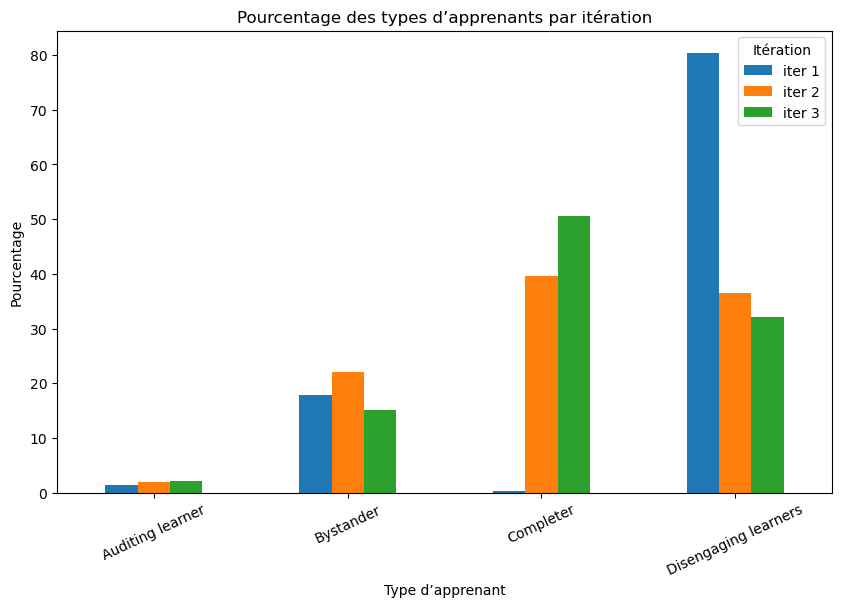

In [21]:
df_relevante0 = df_iter_concat_v2[['Participant', 'iteration', 'Grupo_Interaccion', 'Gender']].copy()

df_relevante = df_relevante0[['Participant', 'iteration', 'Grupo_Interaccion', 'Gender']].dropna().reset_index(drop=True)

df_relevante['Total por genero'] = df_relevante.groupby(['Participant', 'Gender'])['iteration'].transform('count')

# Calculer le pourcentage de chaque participant par rapport au total de chaque interaction
df_relevante['Percentage'] = df_relevante.groupby([
    'iteration', 'Participant'])['Grupo_Interaccion'].transform('count') / df_relevante.groupby('iteration')[
    'Grupo_Interaccion'].transform('count') * 100

# Créer un DataFrame pivoté avec des pourcentages
df_pivot = df_relevante.pivot_table(index='Participant', columns='iteration', values='Percentage', aggfunc='first')

# Réorganiser les colonnes selon l'ordre souhaité
df_pivot = df_pivot[['iter 1', 'iter 2', 'iter 3']]

# Représentez graphiquement le pourcentage de participants à chaque interaction
df_pivot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Type d’apprenant')
plt.xticks(rotation = 25)
plt.ylabel('Pourcentage')
plt.title('Pourcentage des types d’apprenants par itération')
plt.legend(title='Itération')
plt.show()


In [22]:
df_iter_concat_v2.loc[:, "Gender"] = df_iter_concat_v2["Gender"].map({'une femme': 'Femme', 'un homme': 'Homme'})

In [23]:
df_relevante1 = df_iter_concat_v2[['Participant', 'iteration', 'Grupo_Interaccion', 'Gender']].copy()

df_relevante2 = df_relevante1[['Participant', 'iteration', 'Grupo_Interaccion', 'Gender']].dropna().reset_index(drop=True)

# Calculer le total par sexe pour chaque participant
df_relevante2['Total par genre'] = df_relevante2.groupby(['Participant', 'Gender'])['iteration'].transform('count')

# Supprimer les données nulles
df_relevante2.dropna(subset=['Participant', 'Gender'], inplace=True)

# Supprimer les doublons
genre_HDI = df_relevante2[['Participant', 'Gender', 'Total par genre']].drop_duplicates()

genre_HDI.reset_index(drop=True, inplace=True)


In [24]:
femme_data = genre_HDI[genre_HDI['Gender'] == 'Femme']
homme_data = genre_HDI[genre_HDI['Gender'] == 'Homme']
print(femme_data)
print('---')
print(homme_data)

            Participant Gender  Total par genre
0             Bystander  Femme              547
1  Disengaging learners  Femme             1712
6             Completer  Femme              569
7      Auditing learner  Femme               45
---
            Participant Gender  Total par genre
2  Disengaging learners  Homme             3665
3             Bystander  Homme             1046
4             Completer  Homme             1017
5      Auditing learner  Homme               99


Participant  Auditing learner  Bystander  Completer  Disengaging learners
Gender                                                                   
Femme                      45        547        569                  1712
Homme                      99       1046       1017                  3665
------------------
Participant  Auditing learner  Bystander  Completer  Disengaging learners
Gender                                                                   
Femme                1.566307  19.039332  19.805082             59.589279
Homme                1.698987  17.950918  17.453235             62.896859


<Figure size 1000x600 with 0 Axes>

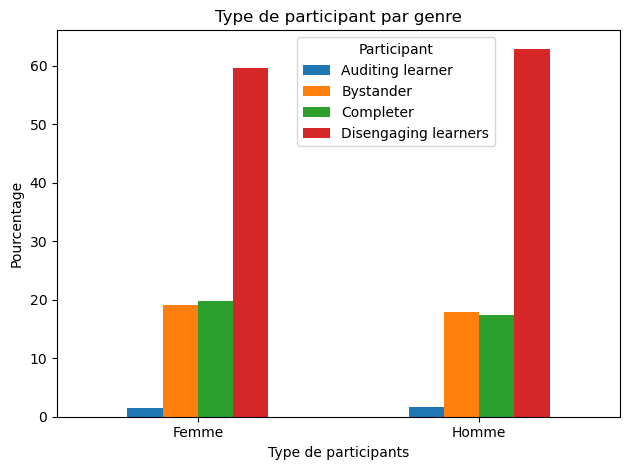

In [25]:
# Regroup les données par genre et par participant 
data_genre = genre_HDI.groupby(['Gender', 'Participant'])['Total par genre'].sum().unstack()
print(data_genre)
data_genre_percentage = data_genre.div(data_genre.sum(axis=1), axis=0) * 100
print('------------------')
print(data_genre_percentage)
plt.figure(figsize=(10, 6))
data_genre_percentage.plot(kind='bar', rot=0)

plt.xlabel('Type de participants')
plt.ylabel('Pourcentage')
plt.title('Type de participant par genre')
plt.legend(title='Participant', bbox_to_anchor=(0.79, 1))
plt.tight_layout()
plt.savefig('participant_par_gender.png', dpi=300)
plt.show()



In [26]:
print(round(df_pivot,1))

iteration             iter 1  iter 2  iter 3
Participant                                 
Auditing learner         1.4     1.9     2.1
Bystander               17.8    22.0    15.2
Completer                0.3    39.6    50.6
Disengaging learners    80.5    36.5    32.1


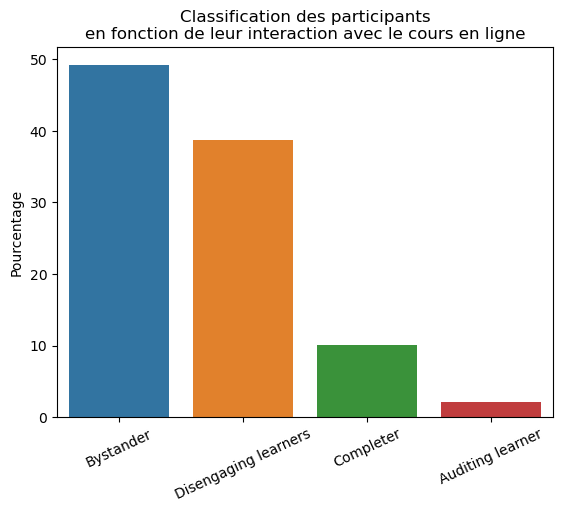

In [27]:
counts1 = df_iter_concat_v2['Participant'].dropna().reset_index(drop=True)

counts = counts1.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation = 25)
plt.ylabel('Pourcentage')
plt.title("Classification des participants\nen fonction de leur interaction avec le cours en ligne")
plt.savefig('participant_par_gender1.png', dpi=300, bbox_inches='tight')
plt.show()

### Chi2 et mosaic plot

<p>Vous allez dans un premier temps croiser les variables HDI et Gender. Réalisez un test d’indépendance fondé sur le chi2. Faites un mosaic plot concernant les résidus de ce chi2.</p>
<p>Décrivez en quelques lignes les résultats obtenus, en fournissant les résultats des tests du chi2 (valeur du chi, et p-value). Calculez le V de Cramer. </p>

In [28]:
# Maintenant, nous allons croiser les variables « Country_HDI » et « Gender » 
# pour réaliser le test d'indépendance basé sur le chi carré. Pour ce faire, 
# nous pouvons utiliser la fonction de tableau croisé Pandas comme suit :

print(df_iter_concat_v2['Gender'].value_counts())

Homme    5827
Femme    2873
Name: Gender, dtype: int64


In [29]:
df_iter_concat_v2['Country_HDI'] = df_iter_concat_v2['Country_HDI'].replace(['M', 'H'], 'I')

In [30]:
porcentaje_faltantes = round(df_iter_concat_v2.isnull().mean() * 100)
porcentaje_faltantes


Student_ID            0.0
Gender               48.0
Country              48.0
Country_HDI          48.0
Country_HDI.fin      48.0
Exam.bin             10.0
Assignment.bin       10.0
Quizz.1.bin          10.0
Quizz.2.bin          10.0
Quizz.3.bin          10.0
Quizz.4.bin          10.0
Quizz.5.bin          10.0
S1.L1                10.0
S1.L2                10.0
S1.L3                10.0
S1.L4                10.0
S1.L5                10.0
S1.L6                10.0
S2.L1                10.0
S2.L2                10.0
S2.L3                10.0
S2.L4                10.0
S2.L5                10.0
S2.L6                10.0
S3.L1.1              10.0
S3.L1.2              10.0
S3.L2                10.0
S3.L3                10.0
S3.L4                10.0
S3.L5                10.0
S4.L1.1              10.0
S4.L1.2              10.0
S4.L2                10.0
S4.L3                10.0
S4.L4                10.0
S4.L5                10.0
S5.L1.1              10.0
S5.L1.2              10.0
S5.L2       

In [31]:
# Cela nous donnera un tableau croisé montrant la fréquence de chaque combinaison
# de valeurs des variables « Country_HDI » et « Gender ».

df = df_iter_concat_v2.copy()

cross_tab = df[['Country_HDI', 'Gender']].dropna().reset_index(drop=True)

cross_tab = pd.crosstab(df['Country_HDI'], df['Gender'])


Gender           Femme      Homme
Country_HDI                      
B             4.875445  13.992699
I             7.829181   6.918130
TH           87.295374  79.089171


<Figure size 800x600 with 0 Axes>

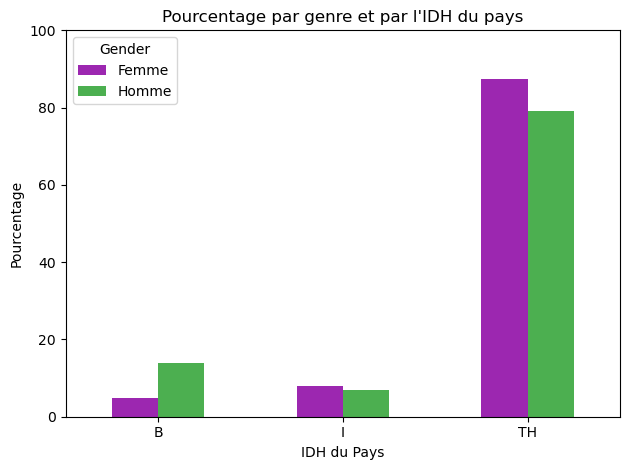

In [32]:
total_gender = cross_tab.sum(axis=0)

cross_tab_percentage = cross_tab.div(total_gender) * 100

print(cross_tab_percentage)

plt.figure(figsize=(8, 6))

colors = ['#9c27b0', '#4caf50']

cross_tab_percentage.plot(kind='bar', color=colors)

plt.xlabel('IDH du Pays')
plt.ylabel('Pourcentage')
plt.title("Pourcentage par genre et par l'IDH du pays")
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.ylim(0, 100)

plt.tight_layout()
plt.savefig('genre_IDH.png', dpi=300)
plt.show()



In [33]:
# Une fois que nous avons le tableau de contingence,
# nous pouvons effectuer le test d'indépendance du chi2 à l'aide de la fonction
# chi2_contingency de la bibliothèque SciPy. Cette fonction renvoie plusieurs valeurs,
# notamment la valeur de la statistique du chi2 et la p_value.

print(cross_tab)
print('----------------')
chi2, p_value, gdl, tce = stats.chi2_contingency(cross_tab) 
print('chi2 : ',chi2)
print('p_value : ',p_value)
print('Degrés de liberté : ',gdl)
print('----------------')
print('Tableau de contingence attendu :')
print(tce)


Gender       Femme  Homme
Country_HDI              
B              137    805
I              220    398
TH            2453   4550
----------------
chi2 :  160.36859333192302
p_value :  1.5010751061833193e-35
Degrés de liberté :  2
----------------
Tableau de contingence attendu :
[[ 309.12297092  632.87702908]
 [ 202.80042041  415.19957959]
 [2298.07660867 4704.92339133]]


In [34]:
print('0.05 : ', p_value <= 0.05)
print('----------------')
print('0.01 : ', p_value <= 0.01)
print('----------------')
print('0.001 : ', p_value <= 0.001)

0.05 :  True
----------------
0.01 :  True
----------------
0.001 :  True


Calculer le V de Cramer
Après avoir effectué le test d'indépendance, nous pouvons calculer le coefficient V de Cramer pour mesurer la force de l'association entre les variables.

### V de Cramer

In [35]:
# Fonction envoyée par le prof
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


In [36]:
n = cross_tab.sum().sum()
V_cramer = np.sqrt(chi2 / (n * (min(cross_tab.shape) - 1)))
print("V_cramer_GPT : ", V_cramer)
v_cramer_prof = cramers_v(df['Gender'], df['Country_HDI'])
print("V_cramer_Prof : ", v_cramer_prof)

# Le coefficient V de Cramer varie entre 0 et 1, où 0 indique aucune association
# et 1 indique une association complète

print('---------------')

print("Les variables sont faiblement associées : ",v_cramer_prof<=0.2)
print("Les variables sont modérément associées : ",v_cramer_prof>0.2 and V_cramer <= 0.6)
print("Les variables sont fortement associées : ",v_cramer_prof>0.6)

V_cramer_GPT :  0.13685059434462565
V_cramer_Prof :  0.13600240883635922
---------------
Les variables sont faiblement associées :  True
Les variables sont modérément associées :  False
Les variables sont fortement associées :  False


### Mosaic plot

In [37]:
df_mosaic = df[['Country_HDI', 'Gender']].dropna().reset_index(drop=True)

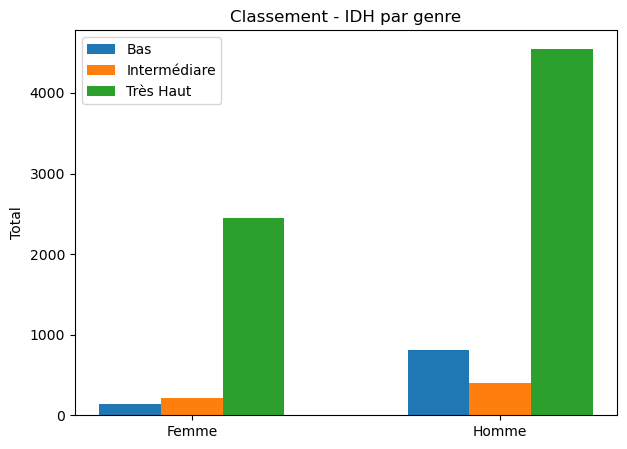

In [38]:
df_mosaic2 = df_mosaic.groupby(['Gender', 'Country_HDI']).size().unstack()

df_mosaic2.columns.name = None
df_mosaic2.reset_index(inplace=True)

df_mosaic2.set_index('Gender', inplace=True)

fig, ax = plt.subplots(figsize=(7, 5))

x = np.arange(len(df_mosaic2))

bar_width = 0.2

ax.bar(x - bar_width, df_mosaic2['B'], width=bar_width, label='Bas')
ax.bar(x, df_mosaic2['I'], width=bar_width, label='Intermédiare')
ax.bar(x + bar_width, df_mosaic2['TH'], width=bar_width, label='Très Haut')

ax.set_xticks(x)
ax.set_xticklabels(["Femme", "Homme"])
ax.set_ylabel("Total")
plt.title('Classement - IDH par genre')

ax.legend()
plt.savefig('genre_IDH.png', dpi=300)
plt.show()



In [39]:
df_mosaic2.reset_index(inplace=True)

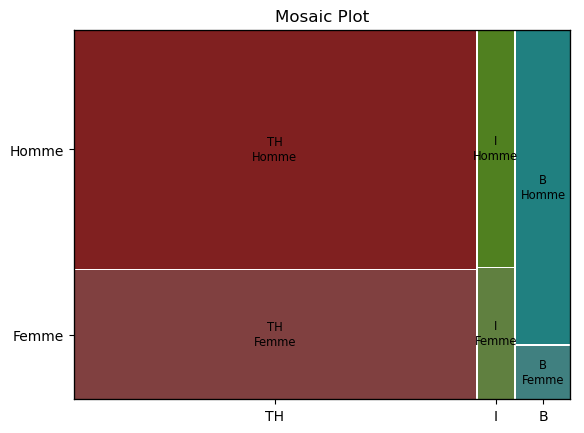

In [40]:
mosaic(df_mosaic, ['Country_HDI', 'Gender'], title='Mosaic Plot')
plt.savefig('mosaic.png', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
residuals = (cross_tab - tce) / np.sqrt(tce)

print('Pearson residuals:')
print(residuals)

Pearson residuals:
Gender          Femme     Homme
Country_HDI                    
B           -9.789786  6.841939
I            1.207768 -0.844091
TH           3.231728 -2.258607


### Test de Student

In [42]:
df_videos = df[['total_videos', 'Gender']].dropna().reset_index(drop=True)


T de Student (test paramétrique) :
Dans ce cas, nous regroupons les données par genre, puis appliquons le test t de Student à l'aide de la fonction ttest_ind de scipy.stats. Le paramètre equal_var=False est utilisé car nous ne supposons pas que les variances des groupes sont égales.

In [43]:
grouped_ttest = df_videos.groupby('Gender')['total_videos']
statistic, pvalue = stats.ttest_ind(*[grouped_ttest.get_group(gender) for gender in grouped_ttest.groups], equal_var=False)
print('Statistic : ', statistic)
print('p value : ', pvalue)

Statistic :  3.8287721010087257
p value :  0.00013017461074546553


In [44]:
def format_p_value(as_p_value):
    if as_p_value < 0.001:
        return "0.001 - ***"
    elif as_p_value < 0.01:
        return "0.01 - **"
    elif as_p_value < 0.05:
        return "0.05 - *"
    else:
        return ""

print('T de Student : ', format_p_value(pvalue))


T de Student :  0.001 - ***


Test non paramétrique (test de Wilcoxon-Mann-Whitney) : Nous utilisons le test de Wilcoxon-Mann-Whitney en utilisant la fonction mannwhitneyu de scipy.stats. Ce test est approprié lorsque les hypothèses de normalité ou d'égalité des variances ne sont pas satisfaites.

### Test de Wilcoxon-Mann-Whitney

In [45]:
grouped_mannwhitney = df_videos.groupby('Gender')['total_videos']
s_tatistic, pValue = stats.mannwhitneyu(*[grouped_mannwhitney.get_group(gender) for gender in grouped_mannwhitney.groups])
print('Statistic : ', s_tatistic)
print('p value : ',pValue)

Statistic :  8766072.0
p value :  0.00031092347538305


In [46]:
print('Test de Wilcoxon-Mann-Whitney : ', format_p_value(pValue))

Test de Wilcoxon-Mann-Whitney :  0.001 - ***


In [47]:
df_analysis = df[['Gender','total_videos', 'total_quizz']].dropna().reset_index(drop=True)


<Figure size 1000x600 with 0 Axes>

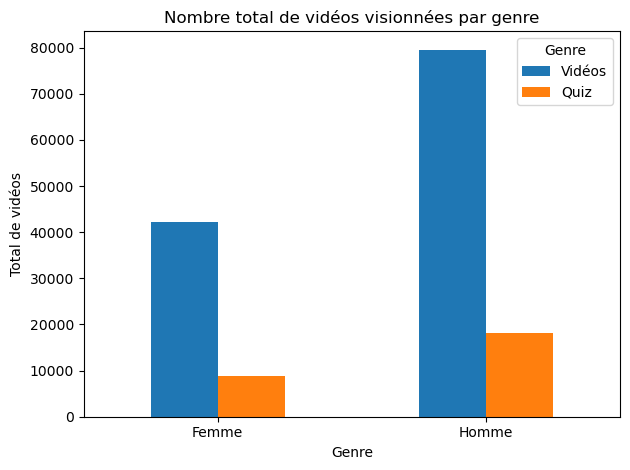

In [48]:
# Regrouper les données par genre 
group_videos = df_analysis.groupby('Gender')[['total_videos', 'total_quizz']].sum()

plt.figure(figsize=(10, 6))
group_videos.plot(kind='bar', rot=0)

plt.xlabel('Genre')
plt.ylabel('Total de vidéos')
plt.title('Nombre total de vidéos visionnées par genre')

plt.legend(labels=['Vidéos', 'Quiz'], title='Genre')

plt.tight_layout()
plt.savefig('videos_visionnes.png', dpi=300)
plt.show()


<Figure size 1000x600 with 0 Axes>

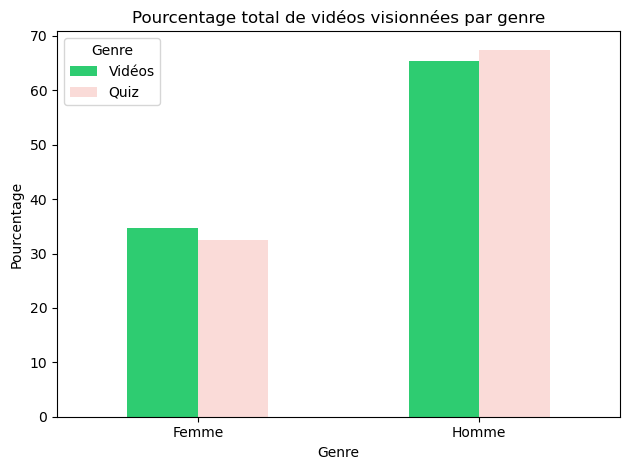

In [49]:
grouped_videos = df_analysis.groupby('Gender')[['total_videos', 'total_quizz']].sum()

total_videos = grouped_videos['total_videos'].sum()
total_quizz = grouped_videos['total_quizz'].sum()

grouped_videos_percentage = grouped_videos.div({'total_videos': total_videos, 'total_quizz': total_quizz}) * 100
colors = ['#2ECC71', '#FADBD8']
plt.figure(figsize=(10, 6))
grouped_videos_percentage.plot(kind='bar', rot=0, color=colors)

plt.xlabel('Genre')
plt.ylabel('Pourcentage')
plt.title('Pourcentage total de vidéos visionnées par genre')

plt.legend(labels=['Vidéos', 'Quiz'], title='Genre')

plt.tight_layout()
plt.savefig('videos_visionnes.png', dpi=300)
plt.show()


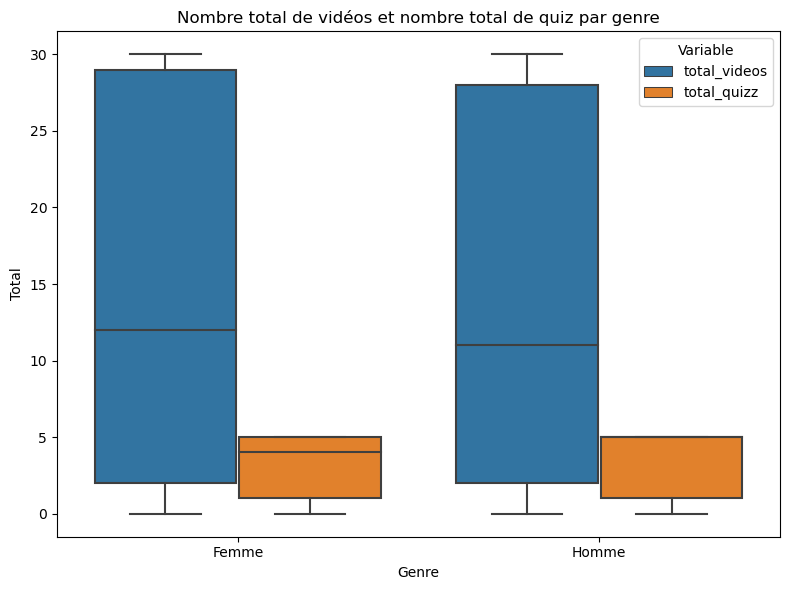

In [50]:
df_melted = df_analysis.melt(id_vars='Gender', value_vars=['total_videos', 'total_quizz'], var_name='Variable',
                             value_name='Value')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_melted, x='Gender', y='Value', hue='Variable')

plt.xlabel('Genre')
plt.ylabel('Total')
plt.title('Nombre total de vidéos et nombre total de quiz par genre')

#plt.legend(labels=['Vidéos', 'Quiz'])
plt.tight_layout()
plt.savefig('boxplot4.png', dpi=300)
plt.show()


Realizar la regresión lineal y obtener los coeficientes de correlación:

In [51]:
df_analysis2 = df_analysis[['total_videos', 'total_quizz']].dropna().reset_index(drop=True)

In [52]:
slope, intercept, r_value, P_value, std_err = stats.linregress(df_analysis2['total_videos'], df_analysis2['total_quizz'])
print('slope : ',slope)
print('intercept : ',intercept)
print('r_value : ',r_value)
print('P_value : ',P_value)
print('std_err : ',std_err)

slope :  0.12929343245917205
intercept :  1.282793144677076
r_value :  0.7244901201557586
P_value :  0.0
std_err :  0.001318964905293126


### Corrélation de Pearson:

In [53]:
pearson_corr, pearson_pvalue = stats.pearsonr(df_analysis2['total_videos'], df_analysis2['total_quizz'])
if pearson_corr > 0:
    interpretation = "Corrélation positive"
elif pearson_corr < 0:
    interpretation = "Corrélation négativea"
else:
    interpretation = "Pas de Corrélation linéaire"

print("Corrélation de Pearson : ", pearson_corr)
print("p_value : ", pearson_pvalue)
print("Résultat : ", interpretation)

Corrélation de Pearson :  0.7244901201557616
p_value :  0.0
Résultat :  Corrélation positive


### Corrélation de Spearman:

In [54]:
correlation_spearman, p_value_spearman = stats.spearmanr(df_analysis2['total_videos'], df_analysis2['total_quizz'])
if correlation_spearman > 0:
    interpretation_spearman = "Corrélation positive"
elif correlation_spearman < 0:
    interpretation_spearman = "Corrélation négative"
else:
    interpretation_spearman = "Pas de corrélation linéaire"

print("Corrélation de Spearman :", correlation_spearman)
print("p_value :", p_value_spearman)
print("Interprétation :", interpretation_spearman)



Corrélation de Spearman : 0.7135664659919927
p_value : 0.0
Interprétation : Corrélation positive


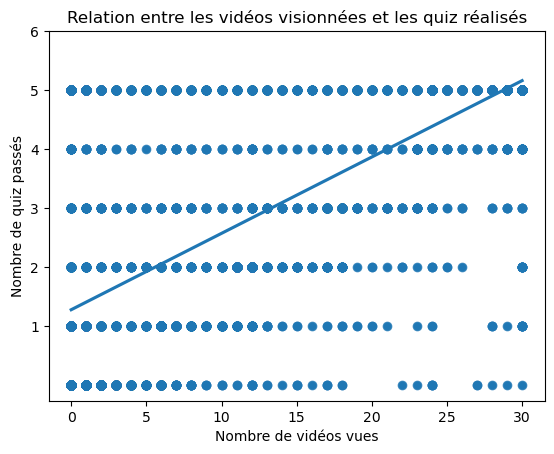

In [55]:
sns.scatterplot(data=df_analysis, x='total_videos', y='total_quizz')
sns.regplot(data=df_analysis, x='total_videos', y='total_quizz', ci=None)
plt.xlabel('Nombre de vidéos vues')
plt.ylabel('Nombre de quiz passés')
plt.title('Relation entre les vidéos visionnées et les quiz réalisés')
plt.yticks(range(1, 7)) 
plt.savefig('scatterplot.png', dpi=300)
plt.show()


In [56]:
df_anova1 = df[['Country_HDI', 'Gender', 'total_videos']].dropna().reset_index(drop=True)

In [57]:
# Effectuer l'ANOVA total_videos ~ C(Gender) + C(Country_HDI) + C(Gender) * C(Country_HDI)'
#model_anova1 = ols('total_videos ~ C(Country_HDI) + C(Gender)', data=df_anova1).fit()
model_anova1 = ols('total_videos ~ C(Gender) + C(Country_HDI) + C(Gender)', data=df_anova1).fit()
anova1_table = sm.stats.anova_lm(model_anova1, typ=2)

print(anova1_table)

                      sum_sq      df           F         PR(>F)
C(Gender)       1.358139e+02     1.0    1.031331   3.098749e-01
C(Country_HDI)  6.599122e+04     2.0  250.559002  1.778330e-106
Residual        1.127117e+06  8559.0         NaN            NaN


In [58]:
print(model_anova1.summary())


                            OLS Regression Results                            
Dep. Variable:           total_videos   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     171.9
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          3.08e-108
Time:                        01:42:44   Log-Likelihood:                -33044.
No. Observations:                8563   AIC:                         6.610e+04
Df Residuals:                    8559   BIC:                         6.612e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.8896 

In [59]:
# l'ANOVA avec interaction
model_interaction = ols('total_videos ~ C(Gender) + C(Country_HDI) + C(Gender) * C(Country_HDI)', data=df_anova1).fit()
anova_table_interaction = sm.stats.anova_lm(model_interaction, typ=2)

print(anova_table_interaction)


                                sum_sq      df           F         PR(>F)
C(Gender)                 1.358139e+02     1.0    1.031456   3.098455e-01
C(Country_HDI)            6.599122e+04     2.0  250.589422  1.730700e-106
C(Gender):C(Country_HDI)  4.001724e+02     2.0    1.519581   2.188627e-01
Residual                  1.126717e+06  8557.0         NaN            NaN


In [60]:
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:           total_videos   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          1.18e-106
Time:                        01:42:44   Log-Likelihood:                -33042.
No. Observations:                8563   AIC:                         6.610e+04
Df Residuals:                    8557   BIC:                         6.614e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Régression logistique

#### Présenter des odd ratios

In [61]:
df_odds = df[['Country_HDI', 'Gender', 'Exam.bin']].dropna().reset_index(drop=True)
df_odds = df_odds.rename(columns={'Exam.bin': 'Examen'})

In [62]:
df_odds_ratio = pd.get_dummies(df_odds, drop_first=True)
X = df_odds_ratio[['Country_HDI_I', 'Country_HDI_TH', 'Gender_Homme']]
y = df_odds_ratio['Examen']

model_odds_ratio = sm.Logit(y, sm.add_constant(X))
result_odds = model_odds_ratio.fit()

print(result_odds.summary())


Optimization terminated successfully.
         Current function value: 0.476690
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Examen   No. Observations:                 8558
Model:                          Logit   Df Residuals:                     8554
Method:                           MLE   Df Model:                            3
Date:                Wed, 19 Jul 2023   Pseudo R-squ.:                0.002343
Time:                        01:42:45   Log-Likelihood:                -4079.5
converged:                       True   LL-Null:                       -4089.1
Covariance Type:            nonrobust   LLR p-value:                 0.0002532
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.6667      0.105    -15.843      0.000      -1.873      -1.460
Country_HDI_I    

In [63]:
coefficients = result_odds.params
conf_int = result_odds.conf_int()
print(coefficients)

const            -1.666675
Country_HDI_I     0.141451
Country_HDI_TH    0.309496
Gender_Homme     -0.132866
dtype: float64


In [64]:
odds_ratios_ex = np.exp(coefficients)
odds_ratios = coefficients
lower_limits_ex = np.exp(conf_int[0])
upper_limits_ex = np.exp(conf_int[1])
print("Odds ratios à l’exponentielle")
print(odds_ratios_ex)
print('             ')
print('             ')
print("Odds ratios")
print(odds_ratios)
print('             ')


Odds ratios à l’exponentielle
const             0.188874
Country_HDI_I     1.151945
Country_HDI_TH    1.362738
Gender_Homme      0.875582
dtype: float64
             
             
Odds ratios
const            -1.666675
Country_HDI_I     0.141451
Country_HDI_TH    0.309496
Gender_Homme     -0.132866
dtype: float64
             


In [65]:
p_Country_HDI_I = 0.322
p_Country_HDI_TH = 0.002
p_Gender_Homme = 0.024

print('Country_HDI_I : ', format_p_value(p_Country_HDI_I))
print('--------------------')
print('Country_HDI_TH : ', format_p_value(p_Country_HDI_TH))
print('--------------------')
print('Gender_Homme : ', format_p_value(p_Gender_Homme))


Country_HDI_I :  
--------------------
Country_HDI_TH :  0.01 - **
--------------------
Gender_Homme :  0.05 - *


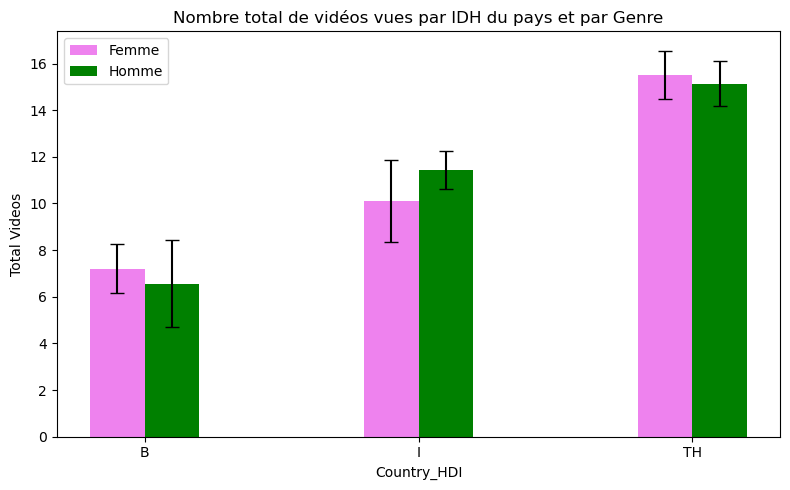

In [66]:
df_test_IDH = df_iter_concat_v2.copy()
df_test = df_test_IDH[['Country_HDI', 'Gender', 'total_videos']].dropna().reset_index(drop=True)

gender_HDI = df_test.groupby(['Country_HDI', 'Gender'])['total_videos'].mean().unstack()

plt.figure(figsize=(8, 5))
bar_width = 0.2
r = np.arange(len(gender_HDI))

plt.bar(r - bar_width, gender_HDI['Femme'], width=bar_width, align='center', label='Femme',
        yerr=np.random.uniform(0.5, 2, size=len(gender_HDI)), capsize=5, color='violet')
plt.bar(r, gender_HDI['Homme'], width=bar_width, align='center', label='Homme',
        yerr=np.random.uniform(0.5, 2, size=len(gender_HDI)), capsize=5, color='green')

plt.xlabel('Country_HDI')
plt.ylabel('Total Videos')
plt.title("Nombre total de vidéos vues par IDH du pays et par Genre")
plt.xticks(r - bar_width / 2, gender_HDI.index)
plt.legend()

plt.tight_layout()
plt.savefig('total_videos_IDH.png', dpi=300)
plt.show()


In [67]:
print("Odds_ratios")
print(len(odds_ratios))
print('-----------------')
variable_names = list(X.columns)
print("Variable Names")
print(variable_names)
print(len(variable_names))



Odds_ratios
4
-----------------
Variable Names
['Country_HDI_I', 'Country_HDI_TH', 'Gender_Homme']
3


In [68]:
coefficient_femme = result_odds.params['Gender_Homme']
odds_ratio_femme = np.exp(coefficient_femme)

print("Odds Ratio 'Femme':", odds_ratio_femme)
variable_names.append("const")

Odds Ratio 'Femme': 0.8755822134725139


### Odds ratios à l’exponentielle - Forest Plot

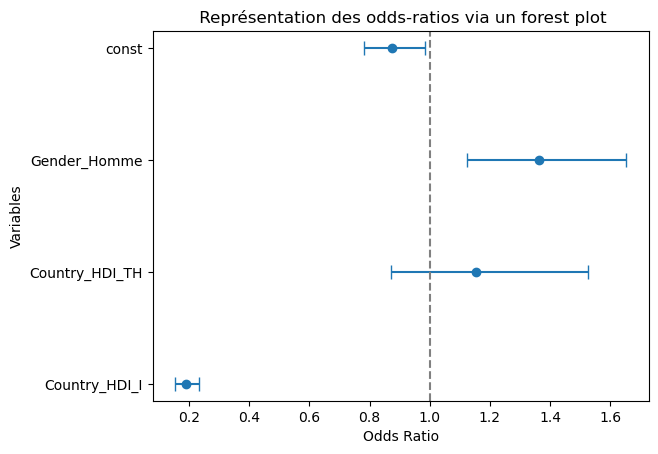

In [69]:
plt.errorbar(odds_ratios_ex, range(len(odds_ratios_ex)), xerr=[odds_ratios_ex - lower_limits_ex,
                                                               upper_limits_ex - odds_ratios_ex], fmt='o', capsize=5)
plt.yticks(range(len(odds_ratios_ex)), variable_names)
plt.axvline(x=1, color='gray', linestyle='--')
plt.xlabel('Odds Ratio')
plt.ylabel('Variables')
plt.title(' Représentation des odds-ratios via un forest plot')
plt.savefig('forestplot1.png', dpi=300)
plt.show()

### Données de comptage et loi de Poisson

In [70]:
df_videos2 = df_iter_concat_v2.copy()
df_poisson = df_videos2[['total_videos']].dropna().reset_index(drop=True)
freq = df_poisson['total_videos'].value_counts().sort_index()
mean = df_poisson['total_videos'].mean()
echan_poisson = poisson.rvs(mu=mean, size=len(df_poisson))

In [71]:
print(freq)

0.0     7165
1.0     1291
2.0      723
3.0      393
4.0      283
5.0      199
6.0      853
7.0      291
8.0      197
9.0      133
10.0     122
11.0     261
12.0     328
13.0     140
14.0     116
15.0      89
16.0      57
17.0     178
18.0     225
19.0     102
20.0      84
21.0      80
22.0      69
23.0     135
24.0     263
25.0     136
26.0     113
27.0     113
28.0     166
29.0     879
30.0    1410
Name: total_videos, dtype: int64


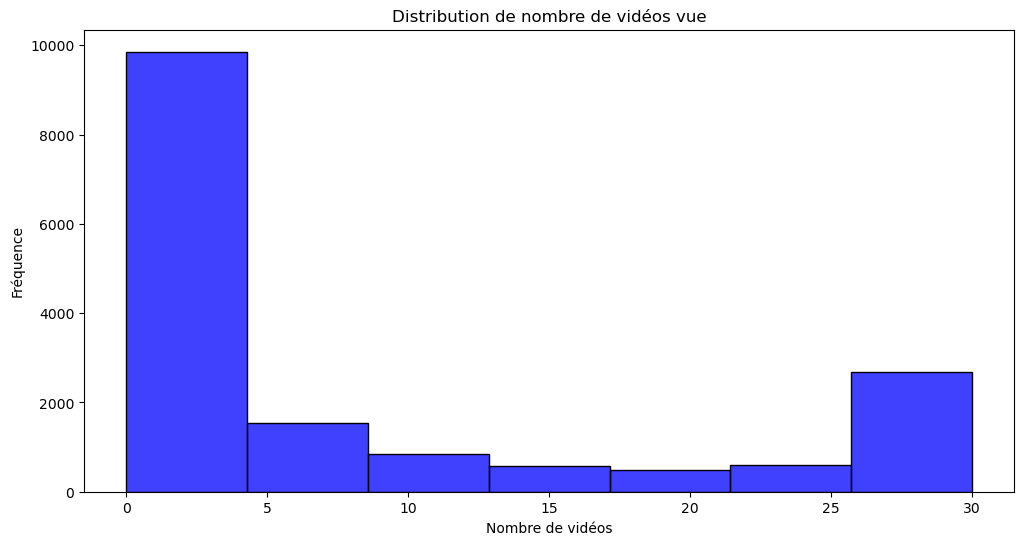

In [72]:
plt.figure(figsize=(12, 6))
sns.histplot(df_poisson['total_videos'], color='blue', bins = 7)
plt.xlabel('Nombre de vidéos')
plt.ylabel('Fréquence')
plt.title('Distribution de nombre de vidéos vue')
plt.savefig('poisson.png', dpi=300)
plt.show()

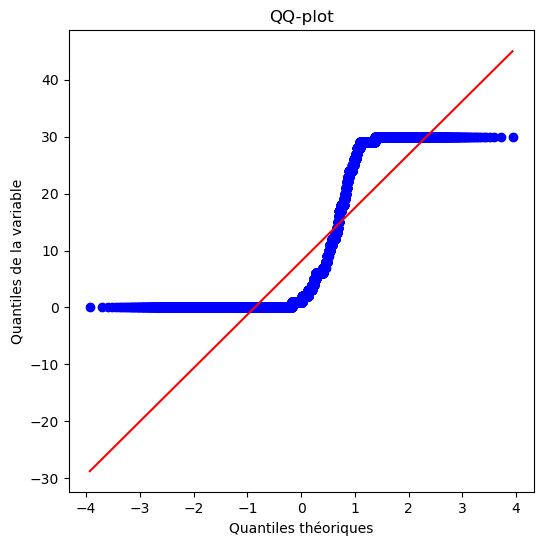

In [73]:
plt.figure(figsize=(6, 6))
stats.probplot(df_poisson['total_videos'], dist="norm", plot=plt)
plt.title('QQ-plot')
plt.xlabel('Quantiles théoriques')
plt.ylabel('Quantiles de la variable')
plt.savefig('qqplot.png', dpi=300)
plt.show()